# **Heart Attack Exploratory Data Analysis & Data Vizualization**


#  1.Reading Data & First Glance

In [ ]:
# import libraries
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
# import data
url = "https://drive.google.com/file/d/1qvkCXkhZ54m8Su7n5BKPm9-1Mz4RlHsP/view?usp=share_link"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
heart = pd.read_csv(path)

In [ ]:
heart.sample(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
102,63,0,1,140,195,0,1,179,0,0.0,2,2,2,1
21,44,1,2,130,233,0,1,179,1,0.4,2,0,2,1
278,58,0,1,136,319,1,0,152,0,0.0,2,2,2,0
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
189,41,1,0,110,172,0,0,158,0,0.0,2,0,3,0


# 2.EDA Part1: Exploratory Data Analysis

## 2.1.Check the features & dataset's shape

In [ ]:
# check the features
heart.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [ ]:
# check the shape (size) of dataset
print(f'The dataset contains {heart.shape[0]} Rows and {heart.shape[1]} Columns')

The dataset contains 303 Rows and 14 Columns


## 2.2. Check the data type of each column

As we can see here, the 'oldpeak' is in the form of float; the other columns are in the form of integer. So, all the columns are continuous numerical variables.

In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## 2.3.Data Cleaning

The purpose of data cleaning is to get our data ready to analyze and visualize.

### Check the missing values

In [ ]:
# check if there are any Null values
heart.isnull().sum().sort_values(ascending=False).head(11)

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
dtype: int64

In [ ]:
# replace missing values with median
# heart = heart.fillna(heart.median())

**CONCLUSION**: As we can see here, there are no missing values in this case

### Check the duplicate rows

In [ ]:
# check duplicated values
heart.duplicated().sum()

1

In [ ]:
# drop duplicated values
heart.drop_duplicates(keep='first',inplace=True)

In [ ]:
heart.duplicated().sum()

0

**CONCLUSION**: Now our data is clean.





## 2.4.Statistics Summary

The main inference that we can get here is, for most of the columns, the mean value is similar with median value (50th percentile: 50%).

In [ ]:
# getting the statistical summary of dataset
heart.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trtbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalachh,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exng,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


## 2.5.Distribution of the target variable

As we can see, there is no imbalance in the dataset.

In [ ]:
# distribution of the target column
heart['output'].value_counts()

1    164
0    138
Name: output, dtype: int64

In [ ]:
# distribution of the target column by mean
heart.groupby('output').mean()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
output,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.585366,0.560976,1.371951,129.250000,242.640244,0.140244,0.591463,158.378049,0.140244,0.586585,1.591463,0.341463,2.121951


In [ ]:
# distribution of the gender column
heart['sex'].value_counts()

1    206
0     96
Name: sex, dtype: int64

## 2.6.Outliers and how to remove them

We will use the IQR (Inter-Quartile Range) method to detect outliners and then visualize them with the help of boxplots.

In [ ]:
continuous_cols=["age","trtbps","chol","thalachh","oldpeak"]
continuous_data=heart[continuous_cols]

for k, v in continuous_data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(heart)[0]
        print("Column {} outliers = {} => {}%".format(k,len(v_col),round((perc),3)))

Column age outliers = 0 => 0.0%
Column trtbps outliers = 13 => 4.305%
Column chol outliers = 5 => 1.656%
Column thalachh outliers = 1 => 0.331%
Column oldpeak outliers = 8 => 2.649%


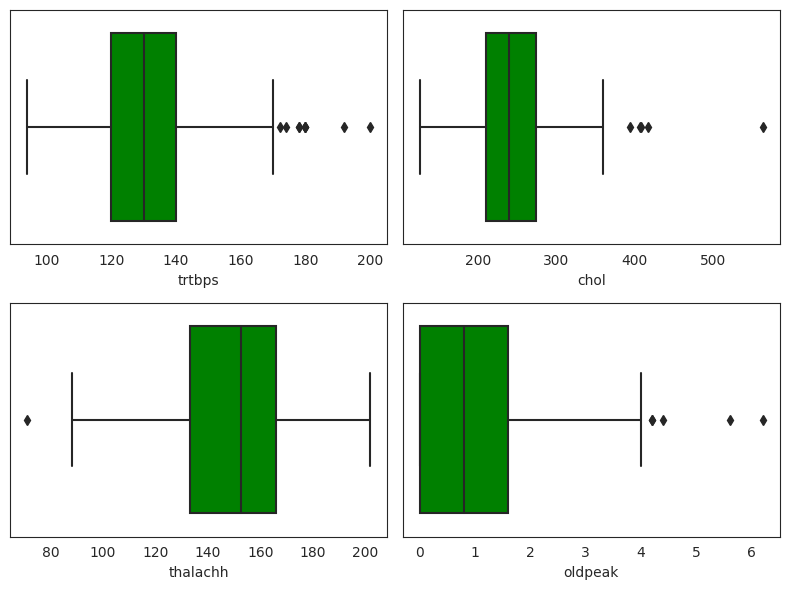

Outliers Present at position: 

trtbps: (array([  8, 101, 110, 152, 194, 202, 222, 227, 240, 247, 259, 265, 291]),)
chol: (array([ 28,  85,  96, 219, 245]),)
thalachh: (array([271]),)
oldpeak: (array([101, 203, 220, 249, 290]),)


In [ ]:
sns.set_style("white")

fig, ax1 = plt.subplots(2,2, figsize=(8,6))
k = 0
for i in range(2):
    for j in range(2):
        sns.boxplot(data=heart,x=heart[continuous_cols[1:][k]],saturation=1,ax=ax1[i][j],color="green")
        k+=1
plt.tight_layout()
plt.show()

#Display the position of outliers
print("Outliers Present at position: \n")
print("trtbps: {}".format(np.where(heart['trtbps']>165)))
print("chol: {}".format(np.where(heart['chol']>360)))
print("thalachh: {}".format(np.where(heart['thalachh']<80)))
print("oldpeak: {}".format(np.where(heart['oldpeak']>4)))

Clearly, there arent many outliers but we still have to try to minimize them as much as we can. We can take the log of these columns to bring all values within a range and minimize the outliners.

In [ ]:
# Using log transformation
# heart["trtbps"]= np.log(heart.trtbps)

# print("---Log Transform performed---")

In [ ]:
# Outliers again
continuous_cols=["age","trtbps","chol","thalachh","oldpeak"]
continuous_data=heart[continuous_cols]

for k, v in continuous_data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(heart)[0]
        print("Column {} outliers = {} => {}%".format(k,len(v_col),round((perc),3)))

Column age outliers = 0 => 0.0%
Column trtbps outliers = 13 => 4.305%
Column chol outliers = 5 => 1.656%
Column thalachh outliers = 1 => 0.331%
Column oldpeak outliers = 8 => 2.649%


After performing the log transform a significant number of outliners was reduced as observed above.

### **Inferences So Far**

- The dataset contains 303 Rows and 14 Columns.
- We don’t have any missing values in the dataset.
- We could see that the data is right skewed for most of the features.
- There is no imbalance in the dataset. The distribution of the target column is balanced.

The EDA is not completed yet. We have to do some Data Visualization tasks to understand the data better.

# 3.EDA Part 2: Data Visualization

### **OUTPUT**

**output :**

**0 = Lower risk of heart attack, 1 = Higher risk of heart attack**

In [ ]:
heart1 = heart.copy()

heart1.loc[(heart1.output == 0),'output']='Lower Risk'
heart1.loc[(heart1.output == 1),'output']='Higher Risk'
heart1.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,Higher Risk
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,Higher Risk
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,Higher Risk
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,Higher Risk
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,Higher Risk


In [ ]:
fig = px.pie(heart1,
            names= "output",
            template= "presentation",
            hole= 0.6,
            color_discrete_sequence=['#e1d3c1', '#c64343']
            #color_discrete_sequence=px.colors.sequential.RdBu
             )

# general view
fig.update_layout(title_text='Risk of Heart Attack',
                  title_x=0.5,
                  font=dict( size=18),
                  autosize=False,
                  width=500,
                  height=500,
                  xaxis_title="id",
                  yaxis_title="salary",
                  showlegend=False)

# text inside
fig.add_annotation(dict(x=0.5, y=0.5,  align='center',
                        xref = "paper", yref = "paper",
                        showarrow = False, font_size=22,
                        text="<span style='font-size: 26px; color=#555; font-family:Arial'>Risk<br></span>"))

# view of values
fig.update_traces(textposition='outside', textinfo='percent+label', rotation=120)
fig.show()



**Interpretation**: 

- There is a balance for the target variable in the dataset.

- Approximately 54% (164) of the dataset are higher risk patients and 46% (138) are lower risk patients.

_______________________

### **SEX**

In [ ]:
heart2 = heart.copy()

heart2.loc[(heart2.sex == 0),'sex']='Female'
heart2.loc[(heart2.sex == 1),'sex']='Male'
heart2

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,Male,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,Male,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,Female,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,Male,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,Female,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,Female,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,Male,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,Male,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,Male,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
fig = px.pie(heart2,
            names= "sex",
            template= "presentation",
            hole= 0.6,
            color_discrete_sequence=['#e1d3c1', '#c64343']
            #color_discrete_sequence=px.colors.sequential.RdBu
            )

# layout
fig.update_layout(title_text='Gender Distribution',
                  title_x=0.5,
                  font=dict( size=18),
                  autosize=False,
                  width=500,
                  height=500,
                  showlegend=False)

fig.add_annotation(dict(x=0.5, y=0.5,  align='center',
                        xref = "paper", yref = "paper",
                        showarrow = False, font_size=22,
                        text="<span style='font-size: 26px; color=#555; font-family:Arial'>Gender<br></span>"))

fig.update_traces(textposition='outside',  textinfo='percent+label', rotation=20)
fig.show()

**Interpretation:**


- Around 68% (207) are Male patients, and 32% (96) are Female patients .

In [ ]:
# Compare Heart Attack vs Sex 
df = pd.crosstab(heart['output'],heart['sex'])
df

sex,0,1
output,,
0,24,114
1,72,92


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

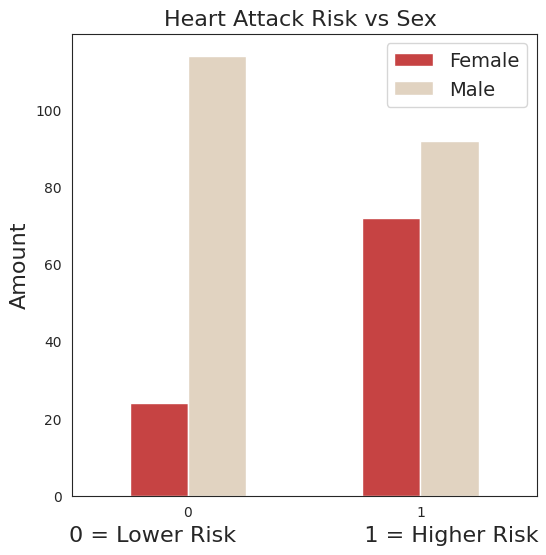

In [ ]:
sns.set_style("white")

df.plot(kind="bar",
        figsize=(6,6),
        color=['#c64343', '#e1d3c1']);


plt.title("Heart Attack Risk vs Sex ", fontsize=16)
plt.xlabel("0 = Lower Risk                  1 = Higher Risk", fontsize=16)
plt.ylabel("Amount", fontsize=16)
plt.legend(["Female","Male"], fontsize=14)
plt.xticks(rotation=0)


**Interpretation:**

- Males have higher risk of heart attack.

__________________________

### **AGE**

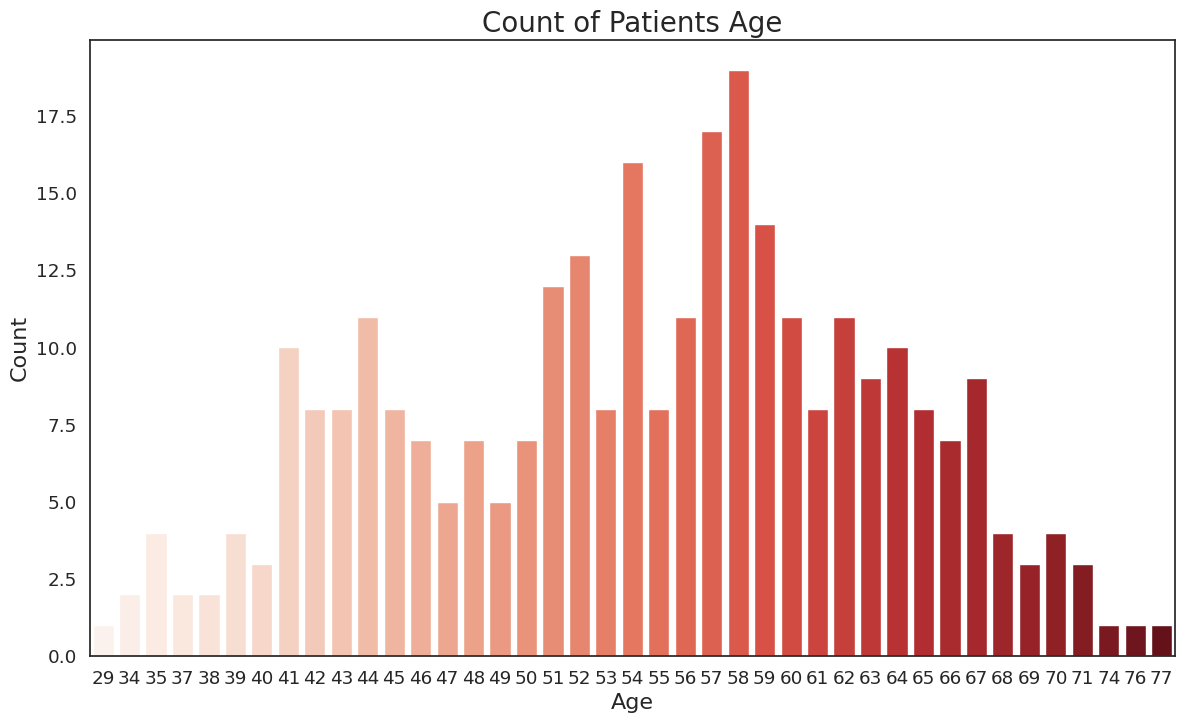

In [ ]:
plt.figure(figsize=(14,8))
sns.set(font_scale=1.2)
sns.set_style("white")

sns.countplot(x=heart["age"],
              palette='Reds')


plt.title("Count of Patients Age",fontsize=20)
plt.xlabel("Age",fontsize=16)
plt.ylabel("Count",fontsize=16)
plt.show()

<ipython-input-27-299700edfb9e>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




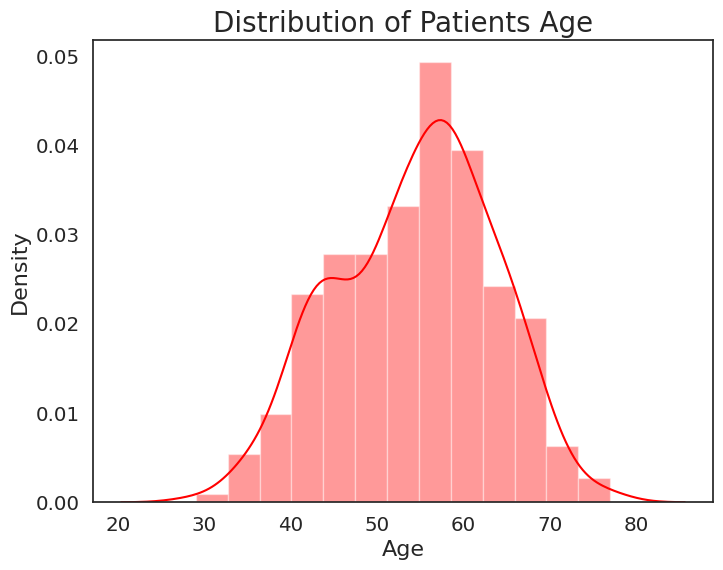

In [ ]:
# age based analysis
sns.set(font_scale=1.3)
plt.figure(figsize=(8,6))
sns.set_style("white")

sns.distplot(heart['age'],
             color='red',
             kde=True)


plt.title("Distribution of Patients Age",fontsize=20)
plt.xlabel("Age",fontsize=16)
plt.ylabel("Density",fontsize=16)
plt.show()

**Interpretation:**

- Most of the patients have age (50-60). In which maximum number of Patients have age 58.

<ipython-input-28-175da5a4b992>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-28-175da5a4b992>:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




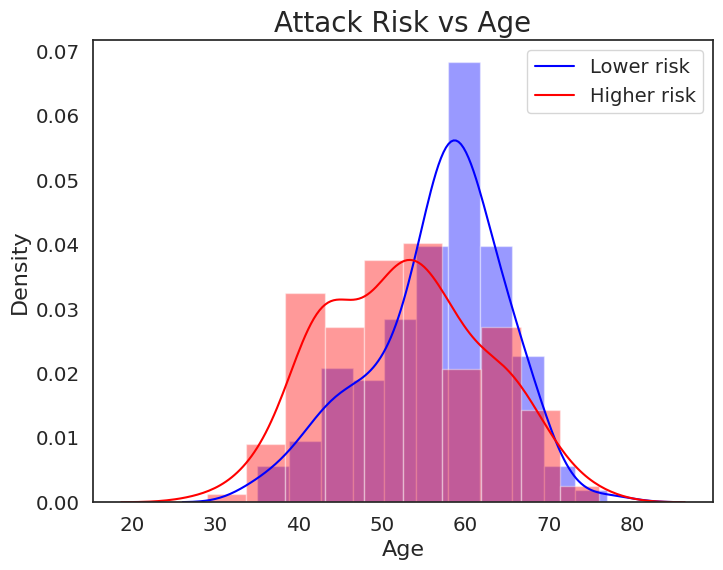

In [ ]:
# Attack vs Age analysis
sns.set(font_scale=1.3)
plt.figure(figsize=(8,6))
sns.set_style("white")


sns.distplot(heart[heart["output"]==0]["age"],
             color="blue")
sns.distplot(heart[heart["output"]==1]["age"],
             color="red")


plt.title("Attack Risk vs Age",fontsize=20)
plt.xlabel("Age",fontsize=16)
plt.ylabel("Density",fontsize=16)
plt.legend(["Lower risk","Higher risk"], fontsize=14)
plt.show()

**Interpretation:**

- Most of the patients have age (50-60).In which maximum number of Patients have age 58.

- There is no strong Relationship with increasing age and high risk of heart attack.

__________________________

### **CHOLESTEROL**

<ipython-input-29-a5fbba19b629>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




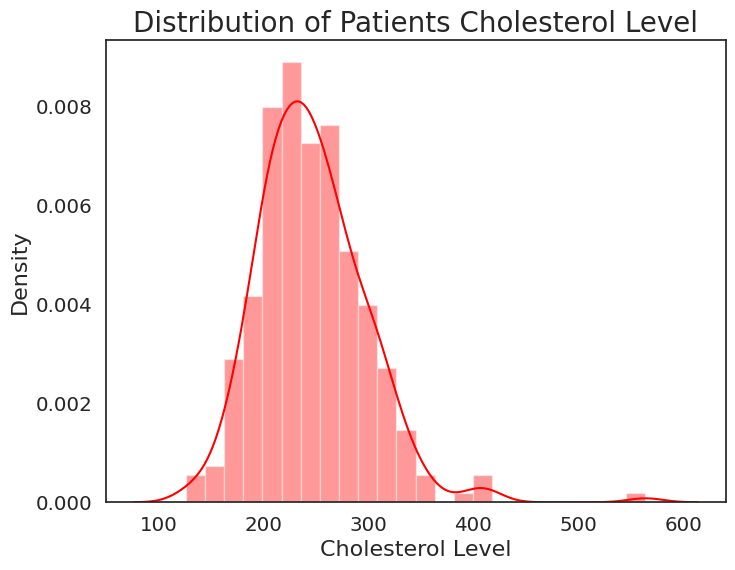

In [ ]:
# Attack vs Cholesterol analysis
sns.set(font_scale=1.3)
plt.figure(figsize=(8,6))
sns.set_style("white")

sns.distplot(heart['chol'],
             color='red',
             kde=True)


plt.title("Distribution of Patients Cholesterol Level",fontsize=20)
plt.xlabel("Cholesterol Level",fontsize=16)
plt.ylabel("Density",fontsize=16)
plt.show()

<ipython-input-30-d7a2531a2ca6>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-30-d7a2531a2ca6>:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




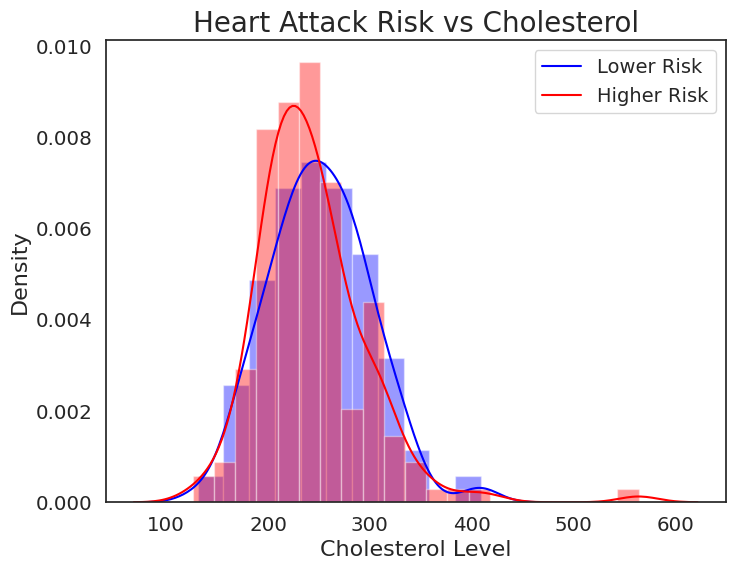

In [ ]:
# Attack vs Cholesterol analysis
sns.set(font_scale=1.3)
plt.figure(figsize=(8,6))
sns.set_style("white")


sns.distplot(heart[heart["output"]==0]["chol"],
             color="blue")
sns.distplot(heart[heart["output"]==1]["chol"],
             color="red")


plt.title("Heart Attack Risk vs Cholesterol", size=20)
plt.xlabel("Cholesterol Level", fontsize=16)
plt.ylabel("Density", fontsize=16)
plt.legend(["Lower Risk","Higher Risk"], fontsize=14)
plt.show()

**Interpretation:**

- Most of the patients have cholesterol level between 200-300.

- ?? People having cholestrol 200-250 are more likely to have heart attack.
- There is a Relationship with increasing age and high risk of heart attack.

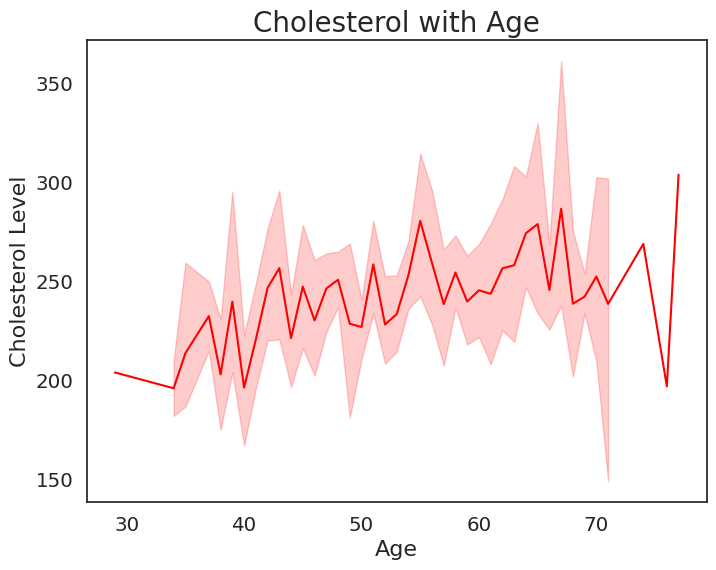

In [ ]:
plt.figure(figsize=(8,6))

sns.lineplot(y="chol",
             x="age",
             data=heart,
             color="red")

plt.title("Cholesterol with Age",fontsize=20)
plt.xlabel("Age",fontsize=16)
plt.ylabel("Cholesterol Level",fontsize=16)
plt.show()

**Interpretation:**


- There is a high probability of Increase in the Level of Cholesterol in the body with age.

<ipython-input-32-ffcddc89e9d3>:5: UserWarning:

The palette list has more values (3) than needed (2), which may not be intended.



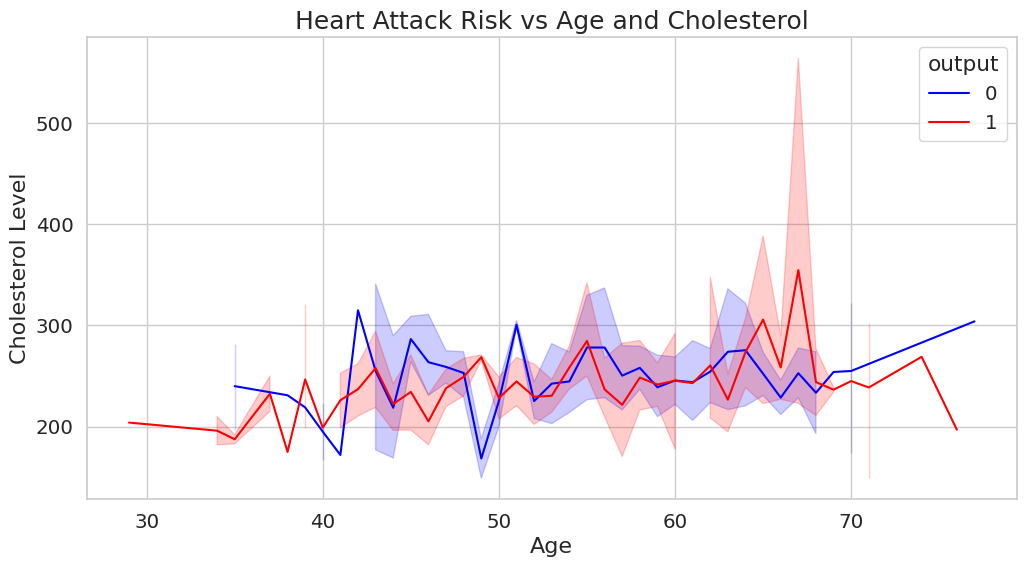

In [ ]:
sns.set(font_scale=1.3)
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))

sns.lineplot(x="age",
             y="chol",
             hue="output",
             palette=['blue', 'red', 'purple'],
             data=heart)

plt.title("Heart Attack Risk vs Age and Cholesterol", fontsize=18)
plt.xlabel("Age", fontsize=16)
plt.ylabel("Cholesterol Level", fontsize=16)
plt.show()

**Interpretation:**

- Higher Cholesterol increases risk of heart attack.

__________________________

### **MAX HEART RATE**

<ipython-input-33-1d2568a9376e>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




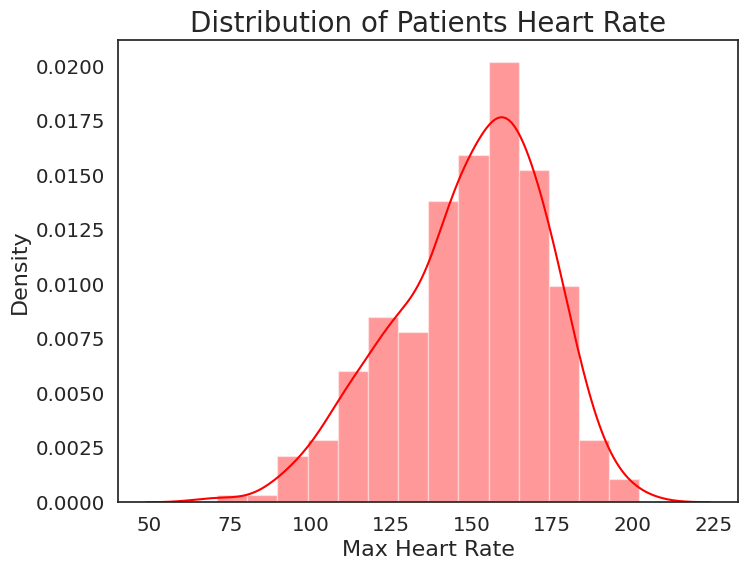

In [ ]:
# Attack vs Heart Rate analysis
sns.set(font_scale=1.3)
plt.figure(figsize=(8,6))
sns.set_style("white")

sns.distplot(heart['thalachh'],
             color='red',
             kde=True)


plt.title("Distribution of Patients Heart Rate", fontsize=20)
plt.xlabel("Max Heart Rate", fontsize=16)
plt.ylabel("Density", fontsize=16)
plt.show()

<ipython-input-34-6cd8565c9176>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-34-6cd8565c9176>:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




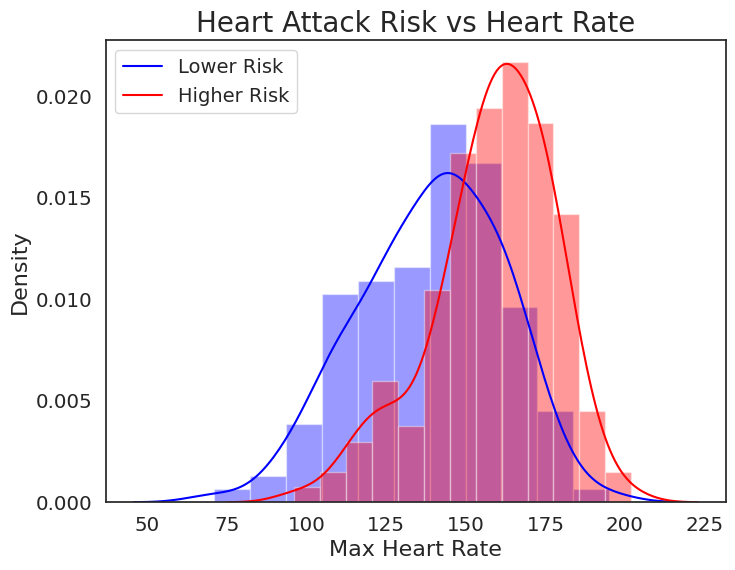

In [ ]:
# Attack vs Heart Rate analysis
sns.set(font_scale=1.3)
plt.figure(figsize=(8,6))
sns.set_style("white")


sns.distplot(heart[heart["output"]==0]["thalachh"],
             color="blue")
sns.distplot(heart[heart["output"]==1]["thalachh"],
             color="red")


plt.title("Heart Attack Risk vs Heart Rate", size=20)
plt.xlabel("Max Heart Rate", fontsize=16)
plt.ylabel("Density", fontsize=16 )
plt.legend(["Lower Risk","Higher Risk"], fontsize=14)
plt.show()


**Interpretation:**


- For most of the patients, Heart Rate is between (155-165).

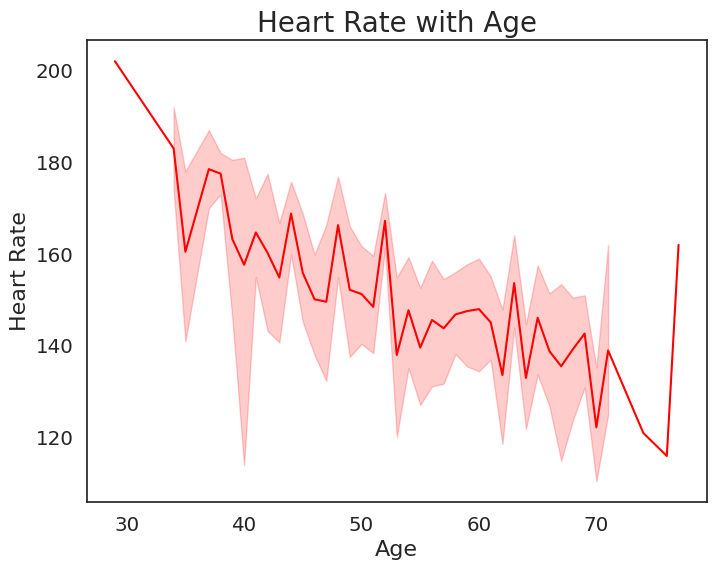

In [ ]:
plt.figure(figsize=(8,6))

sns.lineplot(y="thalachh",
             x="age",
             data=heart,
             color="red")

plt.title("Heart Rate with Age",fontsize=20)
plt.xlabel("Age", fontsize=16)
plt.ylabel("Heart Rate",fontsize=16)
plt.show()

**Interpretation:**


- Max heart rate gets slower as you age

<ipython-input-36-3a7b34073458>:5: UserWarning:

The palette list has more values (3) than needed (2), which may not be intended.



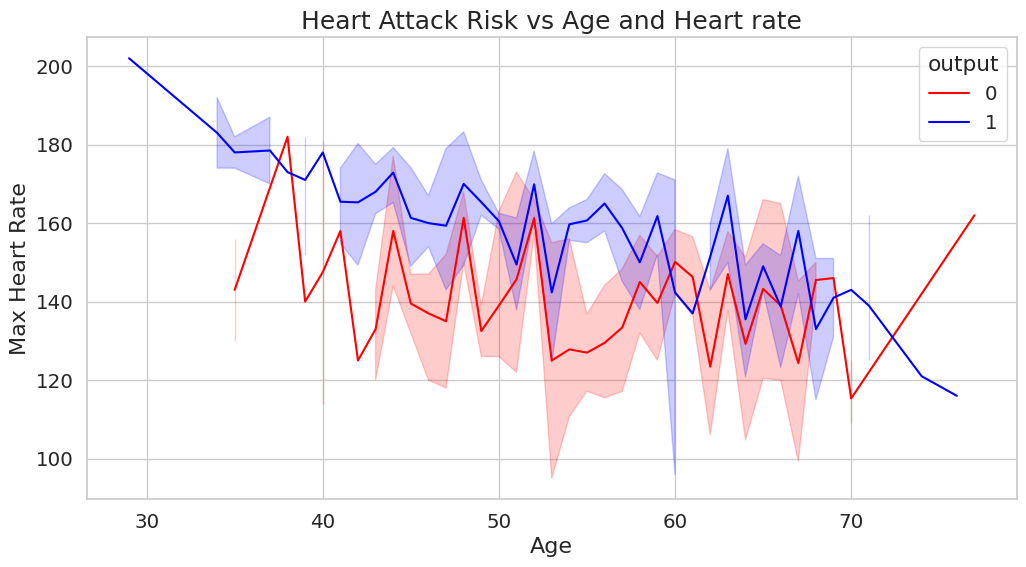

In [ ]:
sns.set(font_scale=1.3)
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))

sns.lineplot(x="age",
             y="thalachh",
             hue="output",
             palette=['red', 'blue', 'purple'],
             data=heart)

plt.title("Heart Attack Risk vs Age and Heart rate", fontsize=18)
plt.xlabel("Age", fontsize=16)
plt.ylabel("Max Heart Rate", fontsize=16)
plt.show()

**Interpretation:**

- People with a high heart rate have a higher risk of heart attack.

__________________________

 ### **BLOOD PRESSURE**

<ipython-input-37-f26ca529dde9>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




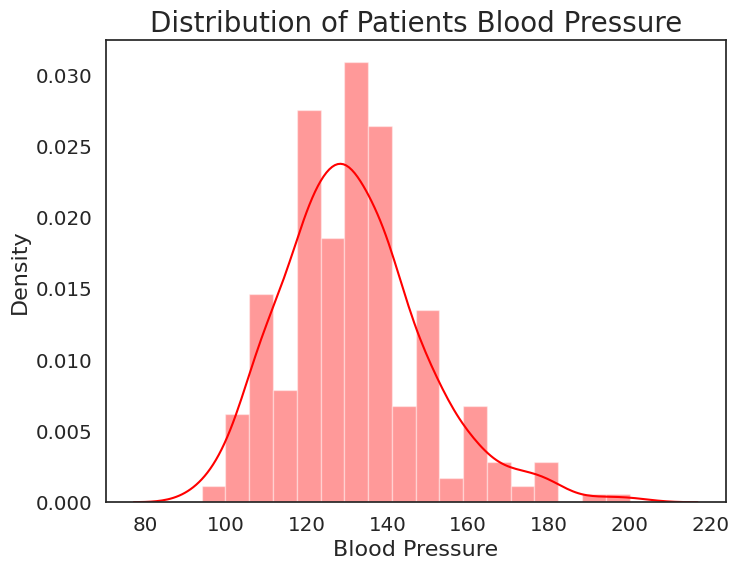

In [ ]:
# Attack vs Blood Pressure analysis
sns.set(font_scale=1.3)
plt.figure(figsize=(8,6))
sns.set_style("white")

sns.distplot(heart['trtbps'],
             color='red',
             kde=True)


plt.title("Distribution of Patients Blood Pressure",fontsize=20)
plt.xlabel("Blood Pressure",fontsize=16)
plt.ylabel("Density",fontsize=16)
plt.show()

<ipython-input-38-308ff02e6e9b>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-38-308ff02e6e9b>:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




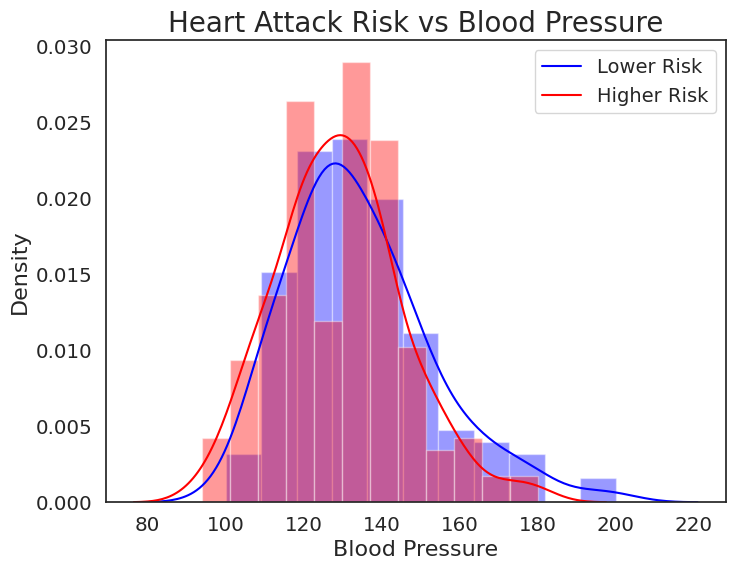

In [ ]:
# Attack vs Blood Pressure analysis
sns.set(font_scale=1.3)
plt.figure(figsize=(8,6))
sns.set_style("white")


sns.distplot(heart[heart["output"]==0]["trtbps"],
             color="blue")
sns.distplot(heart[heart["output"]==1]["trtbps"],
             color="red")


plt.title("Heart Attack Risk vs Blood Pressure", size=20)
plt.xlabel("Blood Pressure", fontsize=16)
plt.ylabel("Density", fontsize=16)
plt.legend(["Lower Risk","Higher Risk"], fontsize=14)
plt.show()

**Interpretation:**

- People having blood pressure between 110 to 140 are more likely to have heart attack.

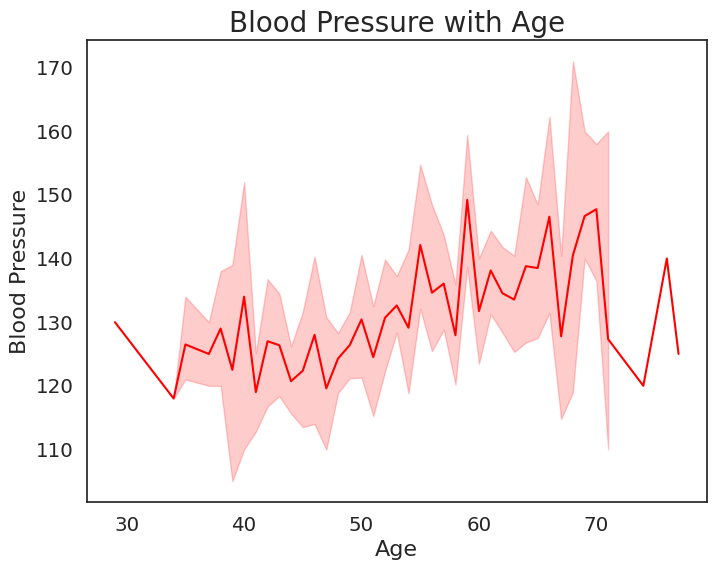

In [ ]:
plt.figure(figsize=(8,6))

sns.lineplot(y="trtbps",
             x="age",
             data=heart,
             color="red")

plt.title("Blood Pressure with Age", fontsize=20)
plt.xlabel("Age", fontsize=16)
plt.ylabel("Blood Pressure", fontsize=16)
plt.show()

**Interpretation:**


- There is high chance of Increase in Blood Pressure in the body with increase in Age.

<ipython-input-40-53d50190f212>:5: UserWarning:

The palette list has more values (3) than needed (2), which may not be intended.



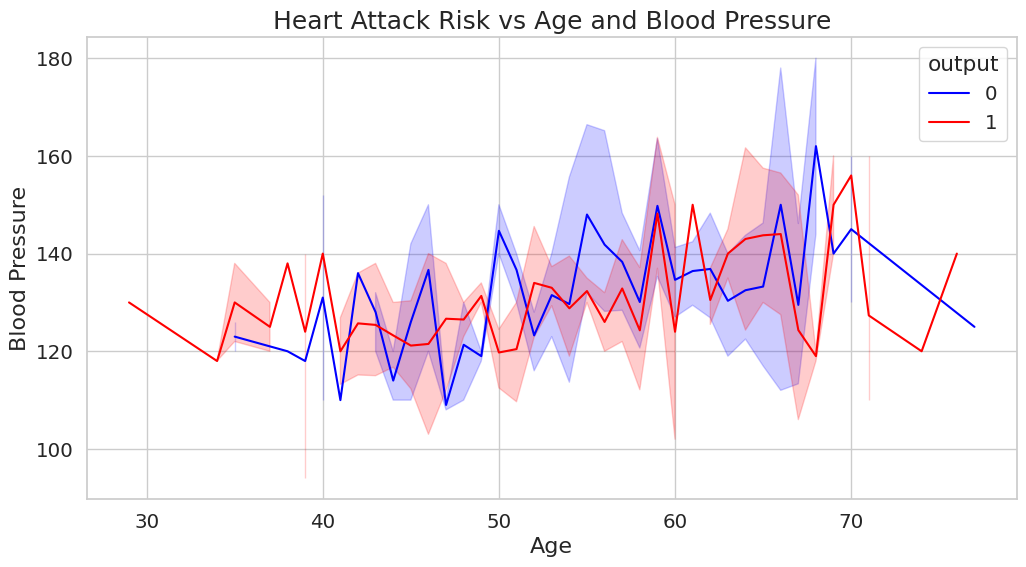

In [ ]:
sns.set(font_scale=1.3)
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))

sns.lineplot(x="age",
             y="trtbps",
             hue="output",
             palette=['blue', 'red', 'purple'],
             data=heart)

plt.title("Heart Attack Risk vs Age and Blood Pressure", fontsize=18)
plt.xlabel("Age", fontsize=16)
plt.ylabel("Blood Pressure",fontsize=16)
plt.show()

**Interpretation:**

- Higher blood pressure increases risk of heart attack.

__________________________

### **CHEST PAIN TYPE**

In [ ]:
heart3 = heart.copy()

heart3.loc[(heart3.cp == 0),'cp']='Typical angina'
heart3.loc[(heart3.cp == 1),'cp']='Atypical angina'
heart3.loc[(heart3.cp == 2),'cp']='Non-anginal pain'
heart3.loc[(heart3.cp == 3),'cp']='Asymptomatic'
heart3.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,Asymptomatic,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,Non-anginal pain,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,Atypical angina,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,Atypical angina,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,Typical angina,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Chest Pain Type based analysis

fig = px.pie(heart3,
            names= "cp",
            template= "presentation",
            hole= 0.6,
            color_discrete_sequence=['#c64343', '#e1d3c1', '#8a2e2e', '#b4a89a']
            )

# layout
fig.update_layout(title_text='Chest Pain Type Distribution',
                  title_x=0.5,
                  font=dict( size=18),
                  autosize=False,
                  width=650,
                  height=650,
                  showlegend=False)

fig.add_annotation(dict(x=0.5, y=0.5,  align='center',
                        xref = "paper", yref = "paper",
                        showarrow = False, font_size=22,
                        text="<span style='font-size: 24px; color=#555; font-family:Arial'>Chest Pain<br>Type</span>"))

fig.update_traces(textposition='outside',  textinfo='percent+label', rotation=10)
fig.show()

**Interpretation:**

- Most of the patients have type of Typical Angina.

In [ ]:
# Relation of Heart Attack with Chest Pain Type
df = pd.crosstab(heart3['cp'], heart['output'])
df

output,0,1
cp,,
Asymptomatic,7,16
Atypical angina,9,41
Non-anginal pain,18,68
Typical angina,104,39


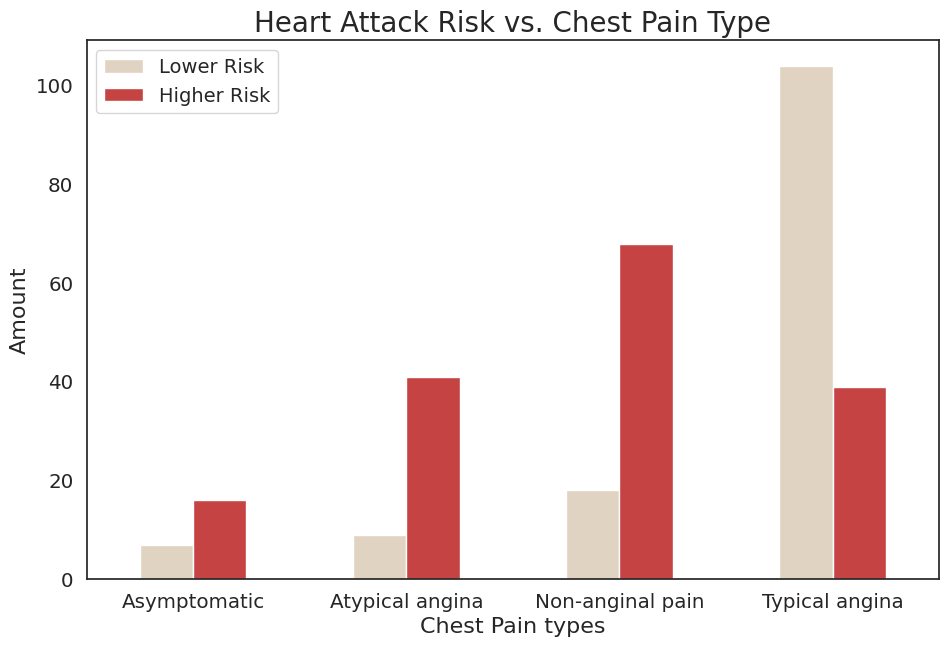

In [ ]:
# Make the crosstab more visual
sns.set(font_scale=1.3)
sns.set_style("white")

df.plot(kind='bar',
        figsize=(11,7),
        color=['#e1d3c1', '#c64343']);

plt.title("Heart Attack Risk vs. Chest Pain Type", fontsize=20)
plt.xlabel("Chest Pain types", fontsize=16)
plt.ylabel("Amount", fontsize=16)
plt.legend(['Lower Risk','Higher Risk'], fontsize=14)
plt.xticks(rotation=0);


**Interpretation:**

- Most of the patients have type of **Typical Angina**.

- Patients with **Non-anginal pain** have a higher risk of heart attack

In [ ]:
#Classification columns
class_cols=["sex","output",'cp',"fbs","exng","restecg","thall","caa","slp"]
class_data=heart[class_cols]

#Continuous columns
continuous_cols=["age","trtbps","chol","thalachh","oldpeak"]
continuous_data=heart[continuous_cols]

In [ ]:
#Pie plots 
for col in class_cols[2:]:
    ax=px.pie(heart,
              names= col,
              template= "presentation",
              title=col,hole=0.6,
              color_discrete_sequence=px.colors.sequential.RdBu)
    ax.show()

   

<ipython-input-47-acf384e7c956>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-47-acf384e7c956>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-47-acf384e7c956>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use ei

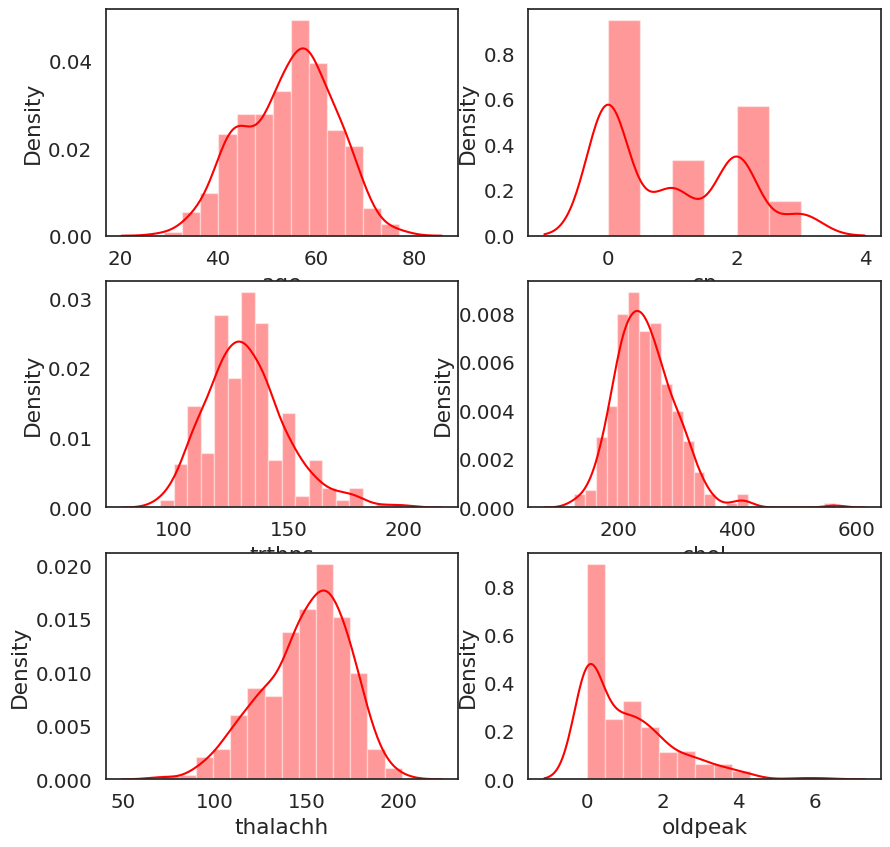

In [ ]:
columns=["age","cp","trtbps","chol","thalachh","oldpeak"]

fig, ax1 = plt.subplots(3,2, figsize=(10,10))
k = 0
for i in range(3):
    for j in range(2):
            sns.distplot(heart[columns[k]], ax = ax1[i][j], color = 'red')
            k += 1
plt.show()

These plots look okay to as none of them except "oldpeak" are skewed too much to the left or right.

__________________________

### **CORRELATION**

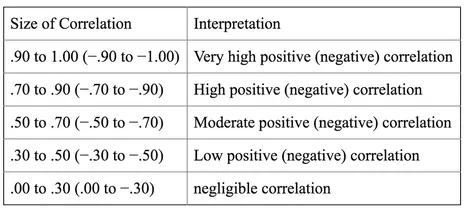

Correlation is used to test relationships between quantitative variables or categorical variables. It’s a measure of how things are related. The table above shows us how we can interpret correlation coefficients.

As we said earlier, seaborn is an awesome library that helps us visualize our variables easily and clearly. The heatmap() method shows us the relationship between numeric variables.

There are different methods to calculate correlation coefficient ;

- Pearson

- Kendall

- Spearman

We will combine the .corr() method with heatmap so that we will be able to see the relationship in the graph. .corr() method is used Pearson correlation by default.



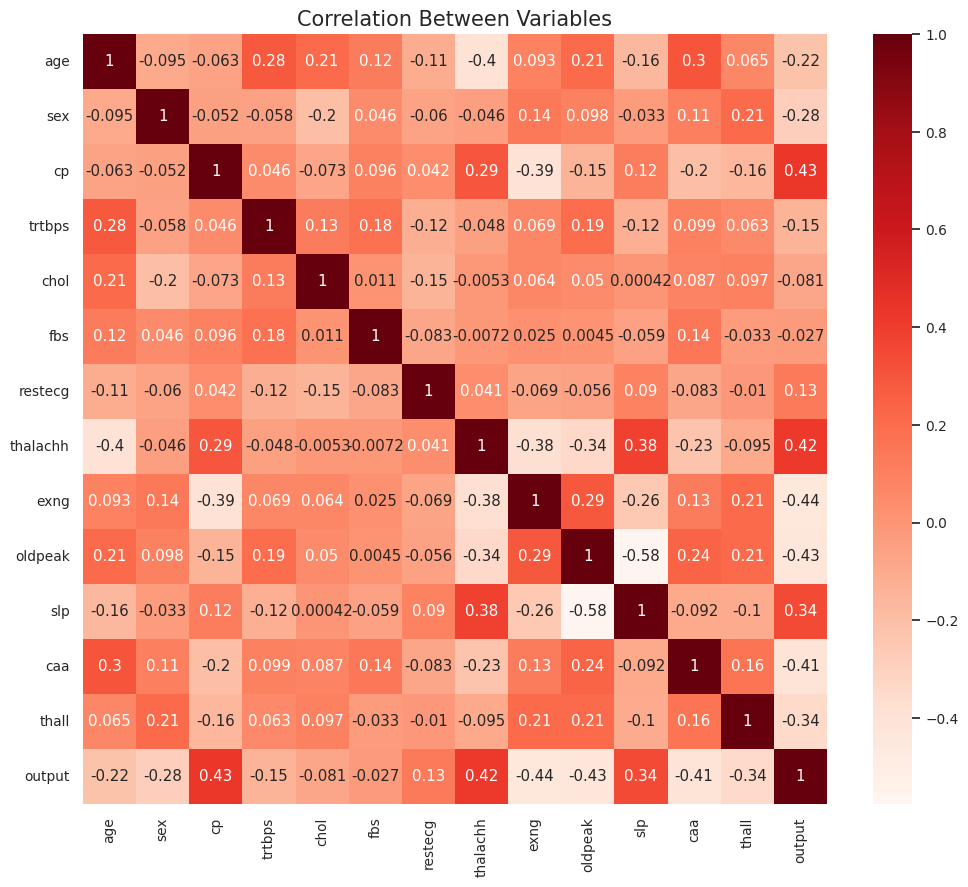

In [ ]:
plt.figure(figsize=(12,10))
sns.set(font_scale=0.9)

sns.heatmap(heart.corr(),
            annot=True,
            cmap='Reds')

plt.title("Correlation Between Variables", size=15)
plt.show()

The heatmap shows us there is a correlation between

- Chest Pain Type (cp) and Output

- Maximum heart rate achieved (thalachh)  and Output

- Slope (sp) and Output


We can also see that there is a weak correlation between

- oldpeak: Previous peak and output

- caa: Number of major vessels and output

- exng: Exercise induced angina

In [ ]:
heart.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


__________________________

# 4.CONCLUSIONS
**Age**

- With increasing age, there is no directly a relationship with the risk of heart attack.

**Gender**

- Males have probable higher risk of heart attack.

**Cholesterol**

- With increasing age, the cholesterol level in the body also increases.

- If there is a high cholesterol level in the body, there is also a high risk of heart attack.

**Blood Pressure**

- There is high chance of Increase in Blood Pressure in the body with increase in Age.


**Chest Pain**

- Person having high chest pain are more probable to suffer from Heart Attack.


**Heart Rate**

- Person having higher heart rate are more probable to suffer from Heart Attack.
